# Chapter 4

In [29]:
import numpy as np
import pandas as pd
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# data prep
file = 'titanic_all_numeric.csv'
df = pd.read_csv(file)
predictors = df.drop('survived', axis='columns').as_matrix()
target = to_categorical(df.survived)

input_shape = (10, )

def get_new_model(input_shape = input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape = input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return(model)

In [19]:
# Import the SGD optimizer
from keras.optimizers import SGD

# Create list of learning rates: lr_to_test
lr_to_test = [0.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer=my_optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Fit the model
    model.fit(predictors, target, epochs=10, validation_split=0.3)
    



Testing model with learning rate: 0.000001

Train on 623 samples, validate on 268 samples
Epoch 1/10
623/623 [==============================] - 0s 746us/step - loss: 1.1689 - acc: 0.4928 - val_loss: 1.4055 - val_acc: 0.4627
Epoch 2/10
623/623 [==============================] - 0s 180us/step - loss: 1.1608 - acc: 0.4767 - val_loss: 1.3988 - val_acc: 0.4590
Epoch 3/10
623/623 [==============================] - 0s 215us/step - loss: 1.1535 - acc: 0.4799 - val_loss: 1.3915 - val_acc: 0.4552
Epoch 4/10
623/623 [==============================] - 0s 152us/step - loss: 1.1456 - acc: 0.4783 - val_loss: 1.3849 - val_acc: 0.4552
Epoch 5/10
623/623 [==============================] - 0s 149us/step - loss: 1.1385 - acc: 0.4751 - val_loss: 1.3784 - val_acc: 0.4440
Epoch 6/10
623/623 [==============================] - 0s 153us/step - loss: 1.1314 - acc: 0.4735 - val_loss: 1.3720 - val_acc: 0.4440
Epoch 7/10
623/623 [==============================] - 0s 154us/step - loss: 1.1243 - acc: 0.4735 - val_l

## Model Validation
Nifty option in fit to split train/test model.fit(<blah>, validation_split=0.3)

In [23]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
hist = model.fit(predictors, target, validation_split=0.3, epochs=10)


Train on 623 samples, validate on 268 samples
Epoch 1/100
623/623 [==============================] - 1s 1ms/step - loss: 0.8921 - acc: 0.6116 - val_loss: 0.7886 - val_acc: 0.6157
Epoch 2/100
623/623 [==============================] - 0s 196us/step - loss: 0.7894 - acc: 0.6292 - val_loss: 0.6395 - val_acc: 0.6866
Epoch 3/100
623/623 [==============================] - 0s 156us/step - loss: 0.6557 - acc: 0.6693 - val_loss: 0.7255 - val_acc: 0.6418
Epoch 4/100
623/623 [==============================] - 0s 160us/step - loss: 0.6004 - acc: 0.6854 - val_loss: 0.5353 - val_acc: 0.7276
Epoch 5/100
623/623 [==============================] - 0s 213us/step - loss: 0.5629 - acc: 0.7014 - val_loss: 0.4996 - val_acc: 0.7388
Epoch 6/100
623/623 [==============================] - 0s 320us/step - loss: 0.5725 - acc: 0.7143 - val_loss: 0.4912 - val_acc: 0.7425
Epoch 7/100
623/623 [==============================] - 0s 229us/step - loss: 0.6647 - acc: 0.6918 - val_loss: 0.4925 - val_acc: 0.7836
Epoch 8/100

Epoch 61/100
623/623 [==============================] - 0s 220us/step - loss: 0.4668 - acc: 0.8090 - val_loss: 0.3984 - val_acc: 0.8246
Epoch 62/100
623/623 [==============================] - 0s 224us/step - loss: 0.4732 - acc: 0.7769 - val_loss: 0.5604 - val_acc: 0.7761
Epoch 63/100
623/623 [==============================] - 0s 210us/step - loss: 0.4565 - acc: 0.8010 - val_loss: 0.4146 - val_acc: 0.8209
Epoch 64/100
623/623 [==============================] - 0s 164us/step - loss: 0.4590 - acc: 0.8026 - val_loss: 0.3991 - val_acc: 0.8172
Epoch 65/100
623/623 [==============================] - 0s 168us/step - loss: 0.4705 - acc: 0.7897 - val_loss: 0.4222 - val_acc: 0.7985
Epoch 66/100
623/623 [==============================] - 0s 179us/step - loss: 0.4494 - acc: 0.8122 - val_loss: 0.4203 - val_acc: 0.8284
Epoch 67/100
623/623 [==============================] - 0s 165us/step - loss: 0.4985 - acc: 0.8042 - val_loss: 0.4062 - val_acc: 0.8209
Epoch 68/100
623/623 [==========================

In [27]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model.fit(predictors, target, validation_split=0.3, epochs=30, callbacks=[early_stopping_monitor])


Train on 623 samples, validate on 268 samples
Epoch 1/30
623/623 [==============================] - 1s 1ms/step - loss: 0.8656 - acc: 0.6083 - val_loss: 0.6194 - val_acc: 0.6418
Epoch 2/30
623/623 [==============================] - 0s 187us/step - loss: 0.6709 - acc: 0.6372 - val_loss: 0.5746 - val_acc: 0.7239
Epoch 3/30
623/623 [==============================] - 0s 174us/step - loss: 0.6161 - acc: 0.6806 - val_loss: 0.5609 - val_acc: 0.7313
Epoch 4/30
623/623 [==============================] - 0s 164us/step - loss: 0.6621 - acc: 0.6404 - val_loss: 0.5323 - val_acc: 0.7313
Epoch 5/30
623/623 [==============================] - 0s 161us/step - loss: 0.7083 - acc: 0.6565 - val_loss: 0.7407 - val_acc: 0.7351
Epoch 6/30
623/623 [==============================] - 0s 188us/step - loss: 0.7703 - acc: 0.6677 - val_loss: 0.5419 - val_acc: 0.7313


In [33]:
# data prep
input_shape = (10,)

model_1 = Sequential()
model_1.add(Dense(10, activation='relu', input_shape=input_shape))
model_1.add(Dense(10, activation='relu'))

# Add the output layer
model_1.add(Dense(2, activation='softmax'))

# Compile model_1
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

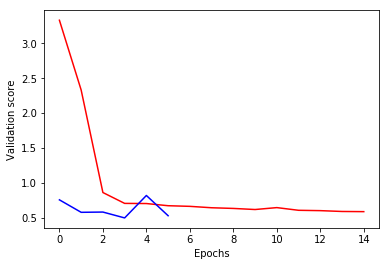

In [34]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model_1
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()


In [38]:
# data prep
n_cols = 10

model_1 = Sequential()
model_1.add(Dense(50, activation='relu', input_shape=input_shape))

# Add the output layer
model_1.add(Dense(2, activation='softmax'))

# Compile model_1
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

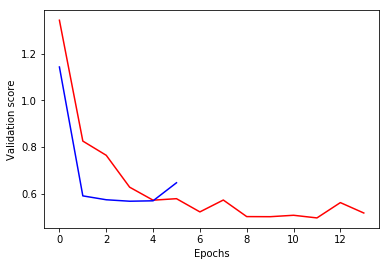

In [43]:
# The input shape to use in the first hidden layer
input_shape = (n_cols,)

# Create the new model: model_2
model_2 = Sequential()

# Add the first, second, and third hidden layers
model_2.add(Dense(50, activation='relu', input_shape=input_shape))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(50, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model 1
model_1_training = model_1.fit(predictors, target,
                               epochs=20, validation_split=0.4,
                               callbacks=[early_stopping_monitor], verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors, target,
                               epochs=20, validation_split=0.4,
                               callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()


## Model Capacity
Experiment. Start small e.g. 1 hidden layer with 100 nodes. Then keep making it bigger - e.g. 1,250, 2,250, 3,200 then when the validation score reduces, try a slightly smaller model than the last.

In [92]:
# data prep
from urllib.request import urlretrieve
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

file = 'mnist.csv'
url = 'https://assets.datacamp.com/production/course_1975/datasets/' + file
urlretrieve(url, file)
df = pd.read_csv(file, header=None)

X = df.iloc[:, 1:].as_matrix()
y = to_categorical(df.iloc[:,0].as_matrix())

ss = StandardScaler()
X_scaled = ss.fit_transform(X)
X_div_255 = X / 255.0

(X_scaled.shape, y.shape)

((2001, 784), (2001, 10))

In [91]:
X[:,100].max()

255.0

In [67]:
to_categorical(df.iloc[:,0])[:,9].sum()

208.0

In [83]:
(y[4,:], X_scaled[4,:])

(array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.        , -0.02236068, -0.02236068, -0.02236068, -0.02236068,
        -0.02236068, -0.02236068, -0.02236068, -0.02236068, -0.02236068,
        -0.02236068, -0.02236068, -0.02236068, -0.02236068, -0.02236068,
        -0.02236068, -0.02236068, -0.02236068, -0.02236068, -0.02236068,
        -0.02236068, -0.02236068, -0.02236068, -0.02236068, -0.02236068,
        -0.02236068, -0.02236068, -0.02236068, -0.02236068, -0.02236068,
        -0.02236068, -0.02236068, -0.02236068, -0.02236068, -0.02236068,
        -0.02236068, -0.02236068, -0.02236068, -0.02236068, -0.03528118,
        -0.0505039 , -0.05140922, -0.05371599, -0.04466228, -0.02977679,
        -0.02240012, -0.02243459, -0.02236068, -0.02236068, -0.02236068,
        -0.02236068, -0.02236068, -0.02236068, -0.02236068, -0.02236068,
        -0.02236068, -0.02236068, -0.02236068, -0.02236068, -0.02236068,
        -0.0224653 , -0.02236068, -0.02236068, -0.02236068, -0.0

In [94]:
# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(100, activation='relu', input_shape=(784,)))

# Add the second hidden layer
model.add(Dense(100, activation='relu'))

# Add the output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model with unscaled data (awful!)
model_unscale = model.fit(X, y, validation_split=0.3, epochs=20, verbose=False)
model_div_255 = model.fit(X_div_255, y, validation_split=0.3, epochs=20, verbose=False)
model_ss      = model.fit(X_scaled, y, validation_split=0.3, epochs=20, verbose=False)

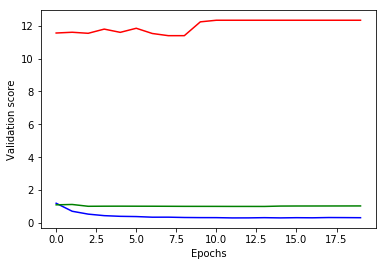

In [97]:
# Create the plot
plt.plot(model_unscale.history['val_loss'], 'r',
         model_div_255.history['val_loss'], 'b',
         model_ss.history['val_loss'], 'g')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

In [98]:
# div 255 for the win... it's intersting the impact negative values have when there are relu's